<a href="https://colab.research.google.com/github/Ramisrkit/Austraian-Waether/blob/main/Ausweather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# problem statement to predict tomorrow rain or not
# go with Logistic Regression

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/weatherAUS.csv')

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [ ]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No
142192,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No


In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [ ]:
df.describe(include=['object'])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,142193,142193,132863,132180,138415,140787,142193
unique,3436,49,16,16,16,2,2
top,2017-06-23,Canberra,W,N,SE,No,No
freq,49,3418,9780,11393,10663,109332,110316


In [ ]:
df.drop(['Date','RISK_MM'],axis=1,inplace=True)

In [ ]:
df.dtypes

,0
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object
WindDir3pm,object


In [ ]:
df.isnull().sum()/len(df)*100

,0
Location,0.000000
MinTemp,0.447983
MaxTemp,0.226453
Rainfall,0.988797
Evaporation,42.789026
Sunshine,47.692924
WindGustDir,6.561504
WindGustSpeed,6.519308
WindDir9am,7.041838
WindDir3pm,2.656952


In [ ]:
df.duplicated().value_counts()

,count
False,142148
True,45


In [ ]:
numeric_cols=df.select_dtypes(include=['int64','float64'])

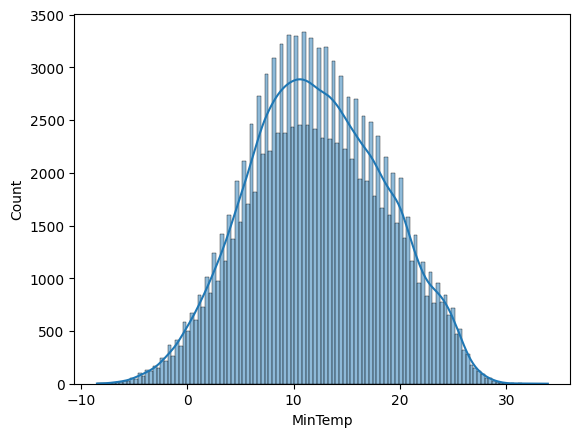

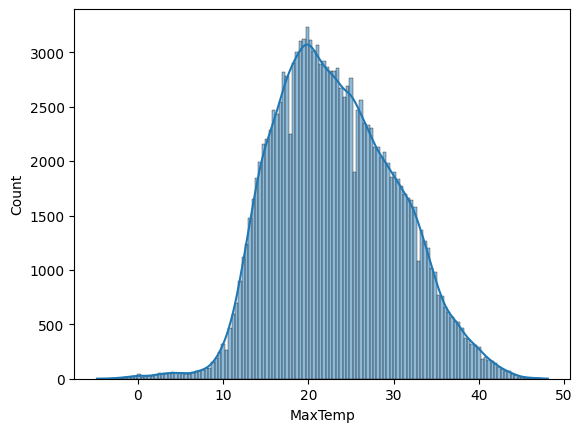

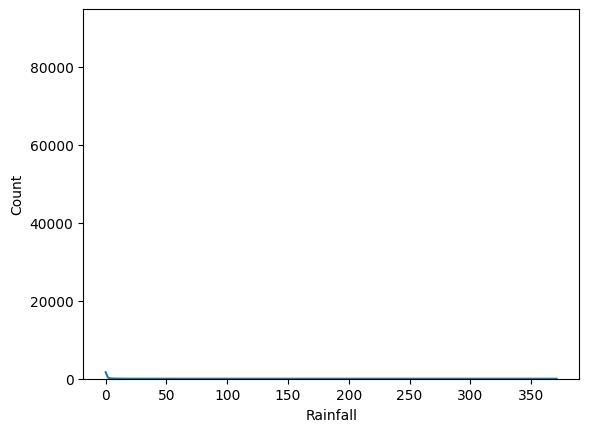

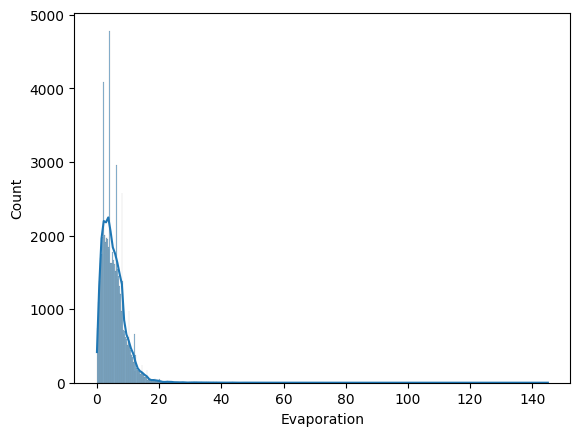

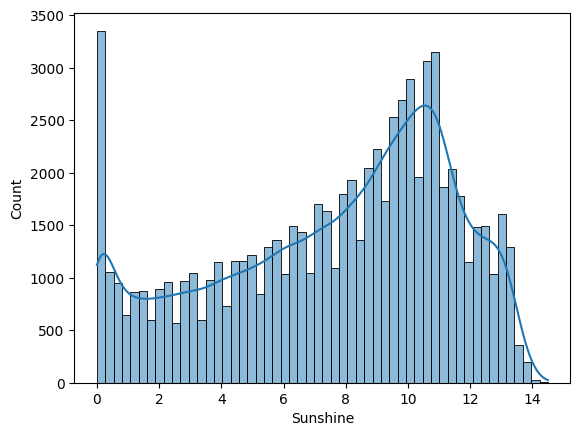

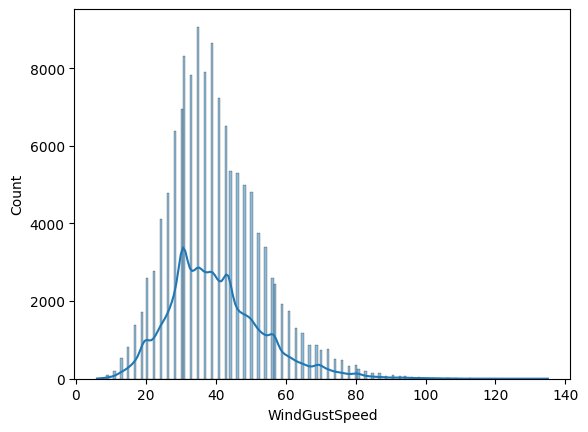

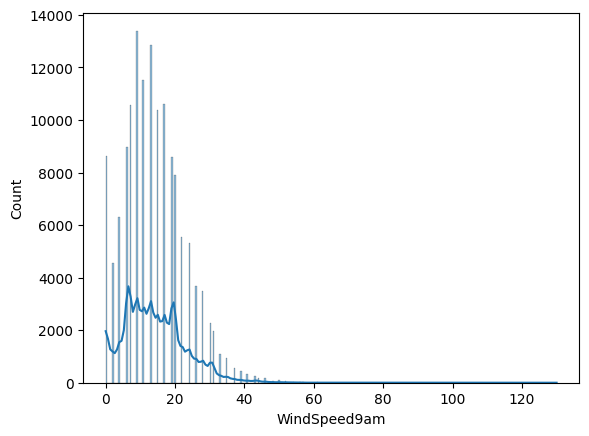

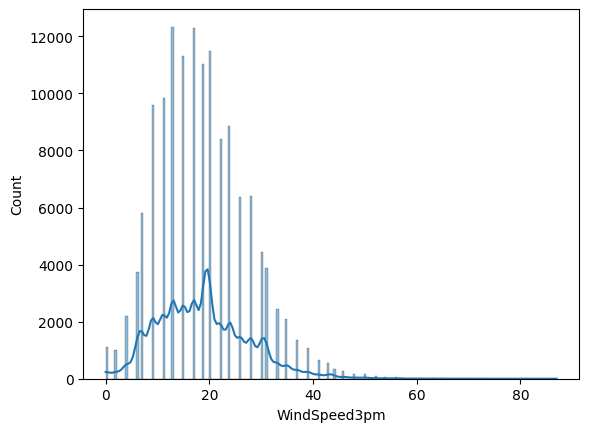

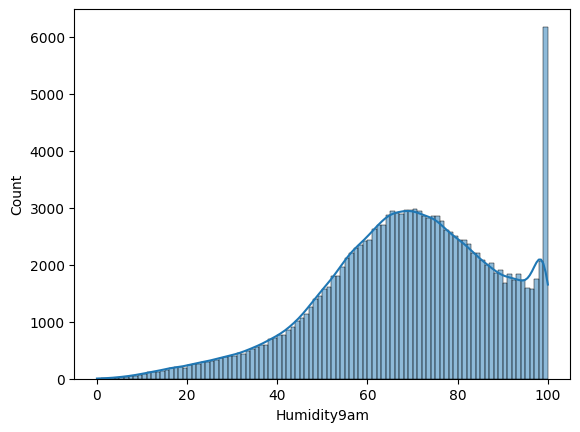

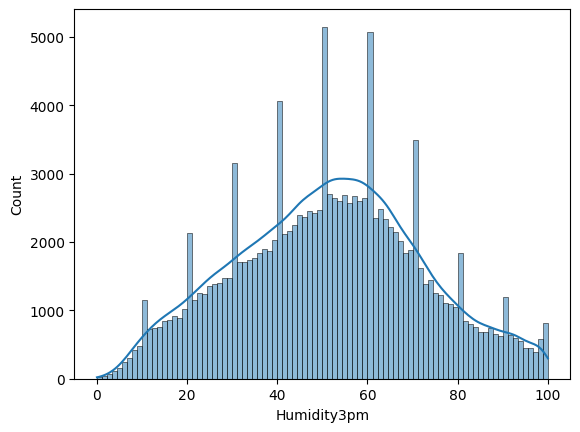

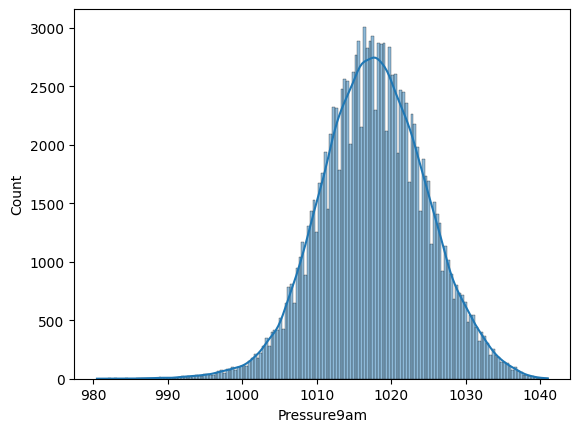

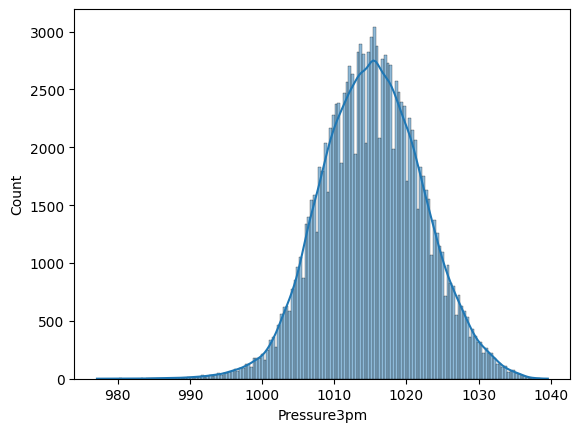

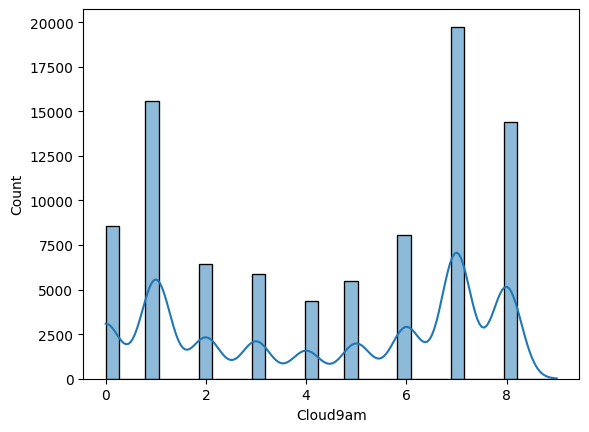

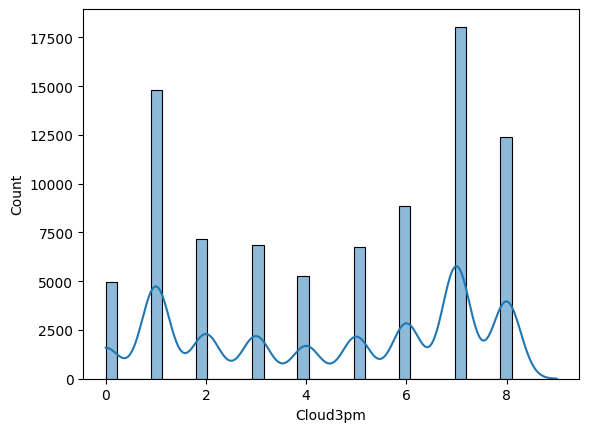

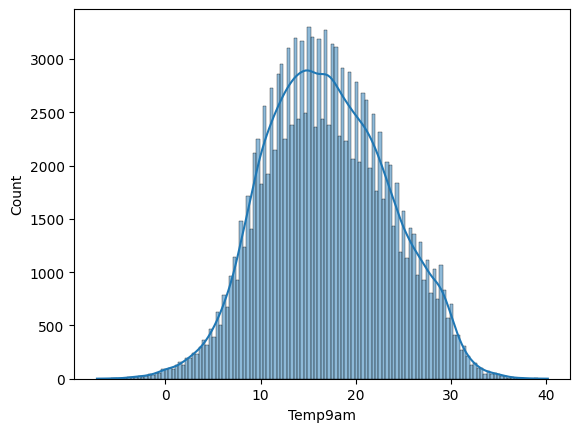

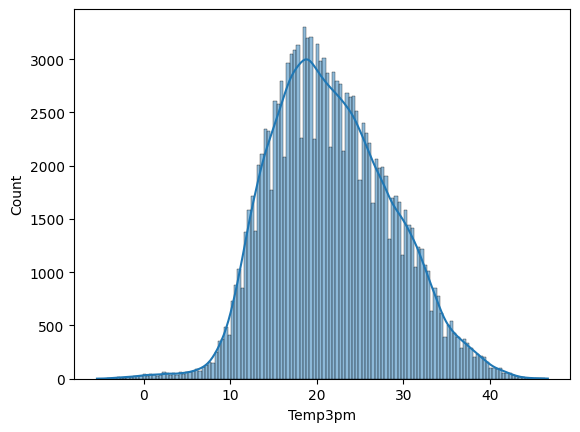

In [ ]:
for i in numeric_cols.columns:
  sns.histplot(df[i],kde=True)
  plt.show()

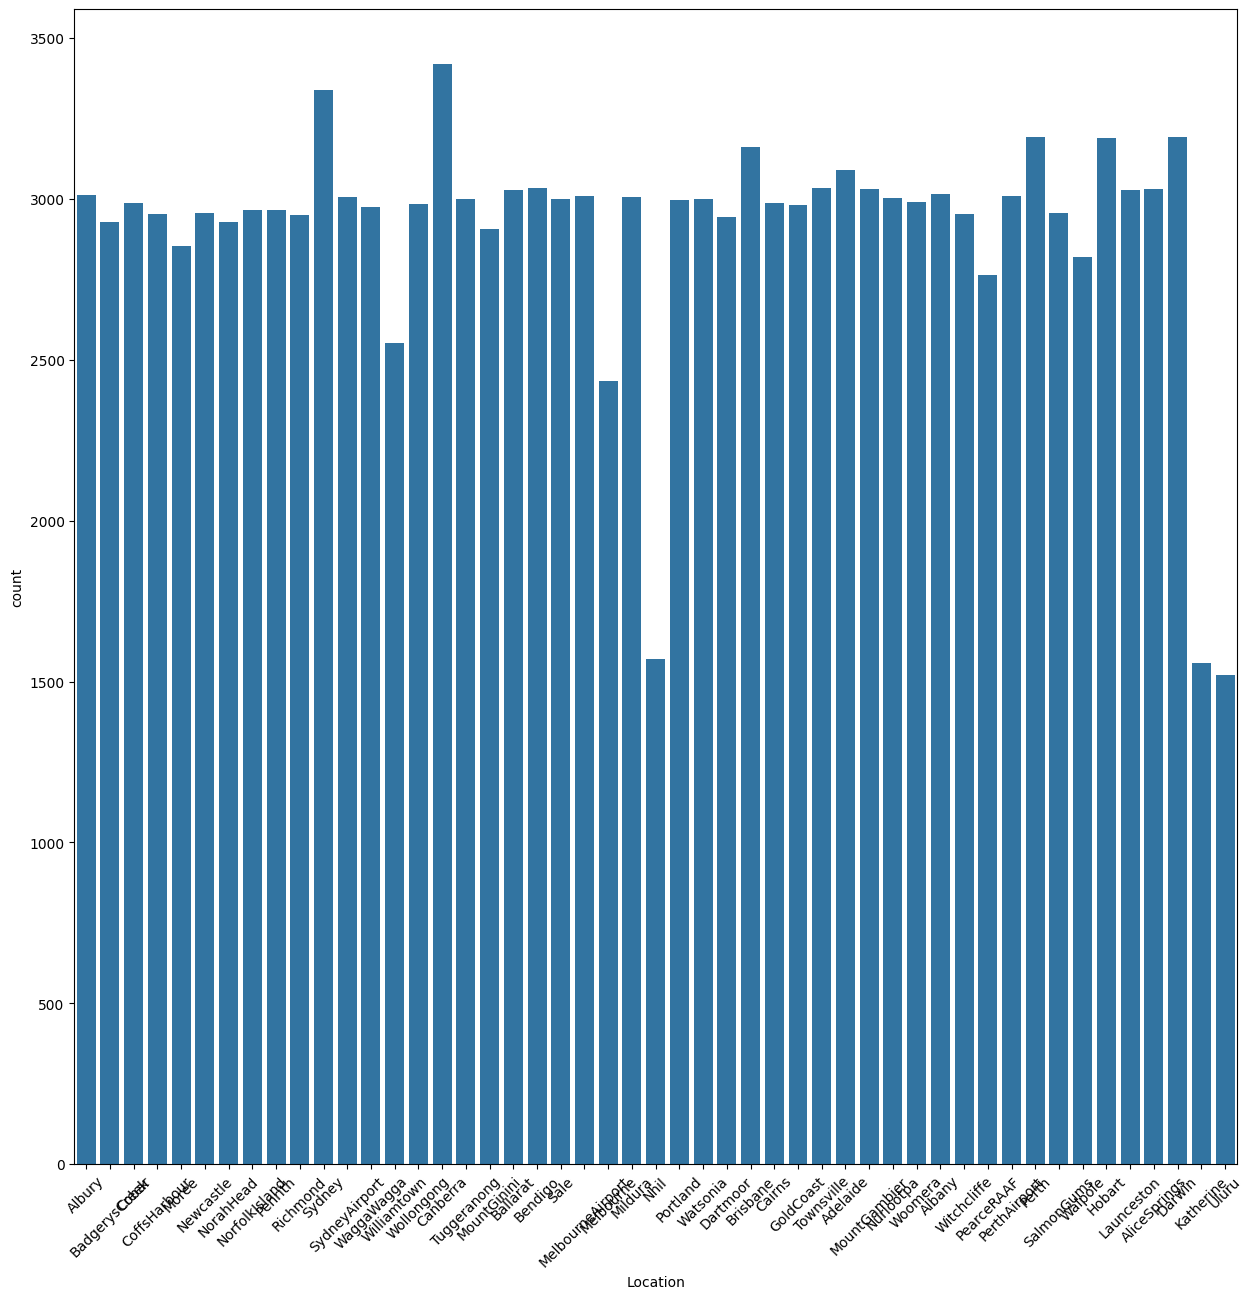

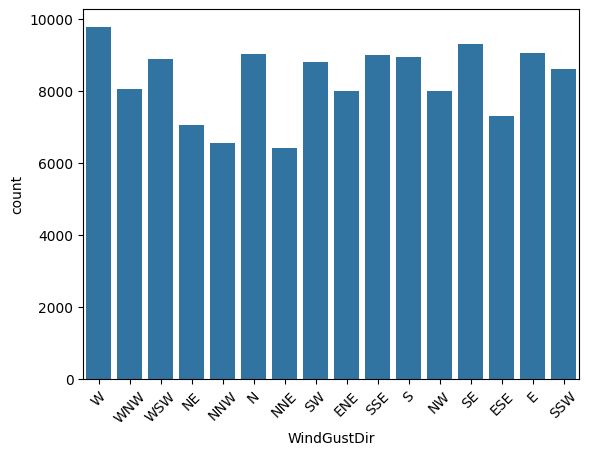

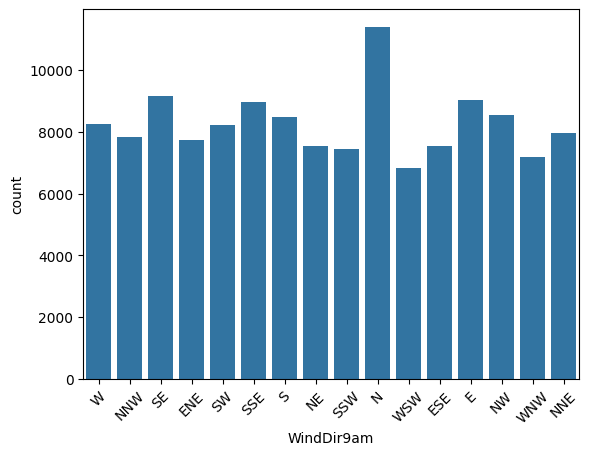

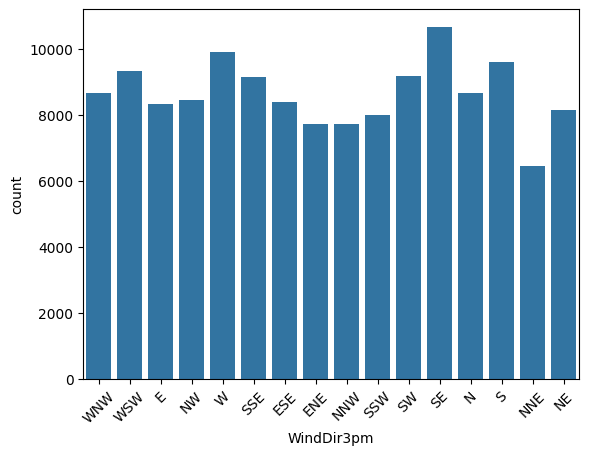

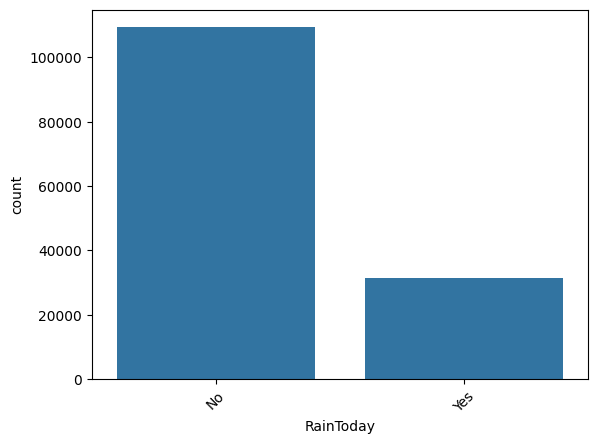

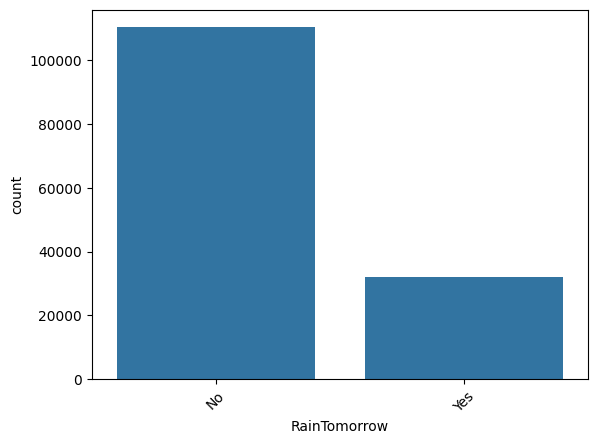

In [ ]:
category_col=df.select_dtypes(include='object')
plt.figure(figsize=(15,15))
for i in category_col.columns:
  sns.countplot(x=df[i])
  plt.xticks(rotation=45)
  plt.show()


<Axes: >

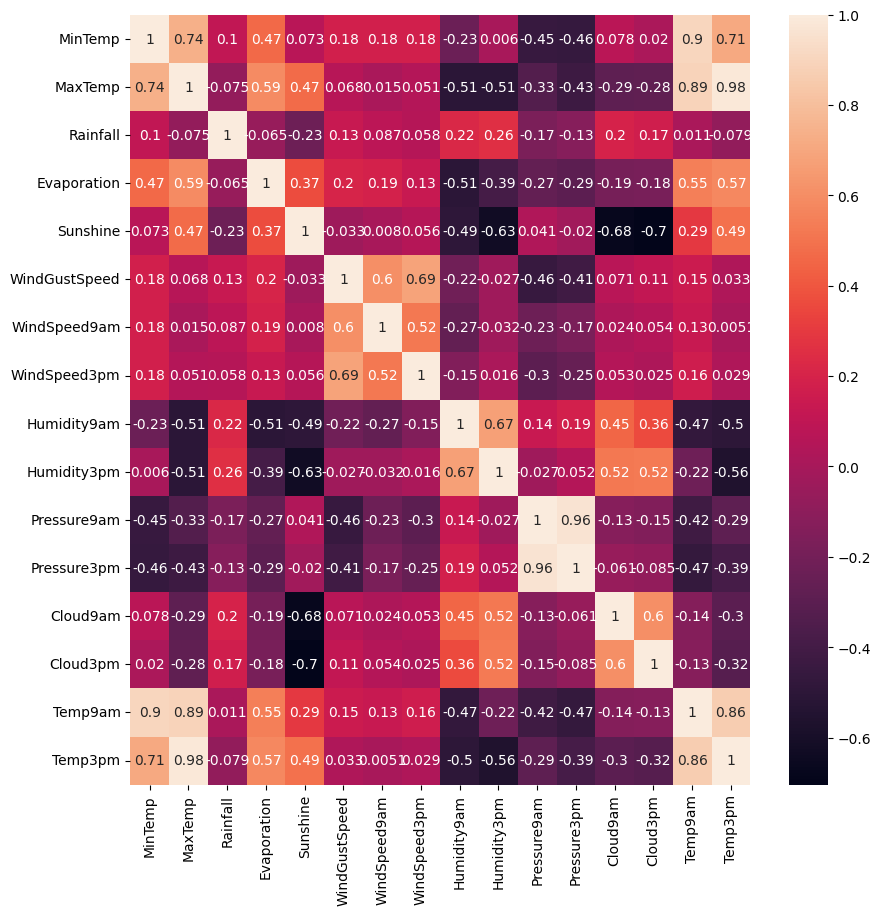

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(numeric_cols.corr(),annot=True)

In [ ]:
for i in numeric_cols.columns:
  df[i]=df[i].fillna(df[i].median())

In [ ]:
for i in category_col.columns.drop('RainTomorrow'):
  df[i]=df[i].fillna(df[i].mode()[0])

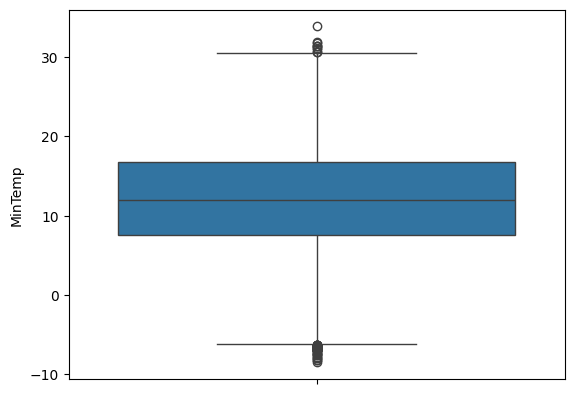

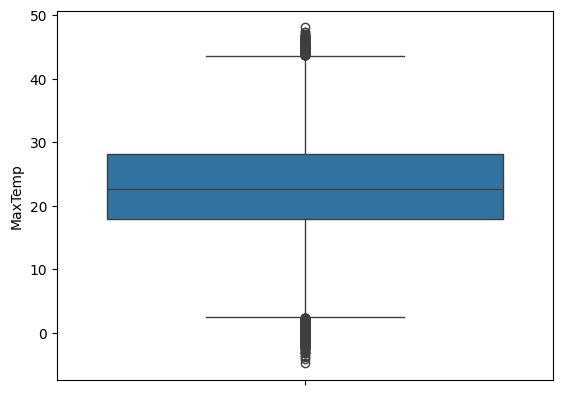

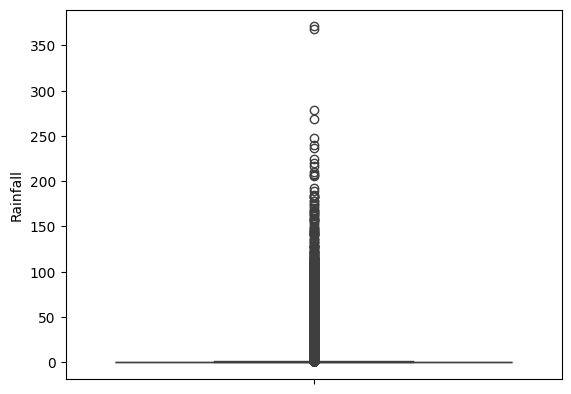

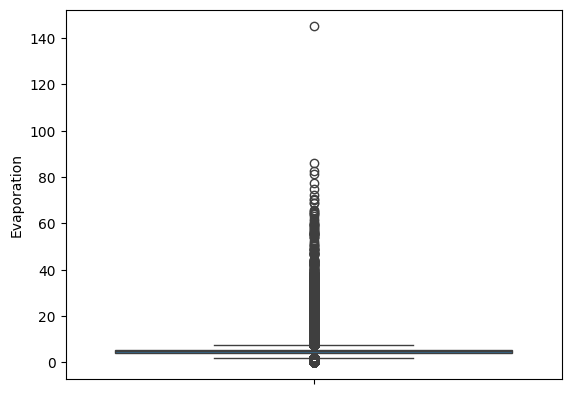

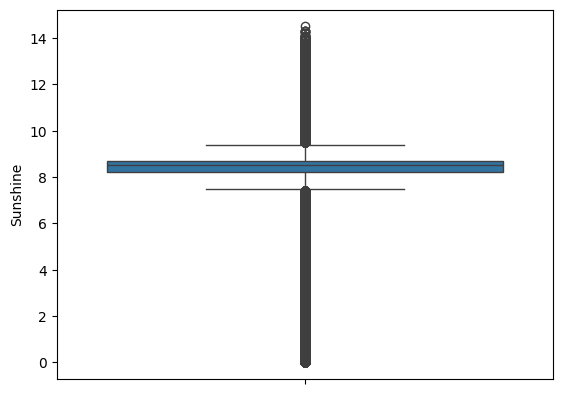

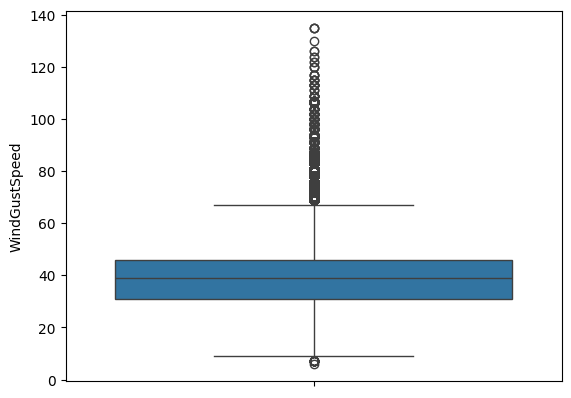

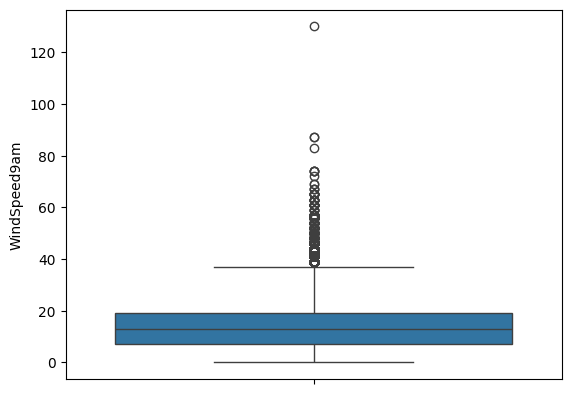

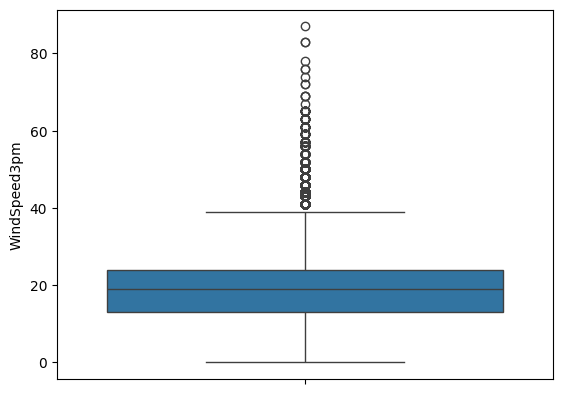

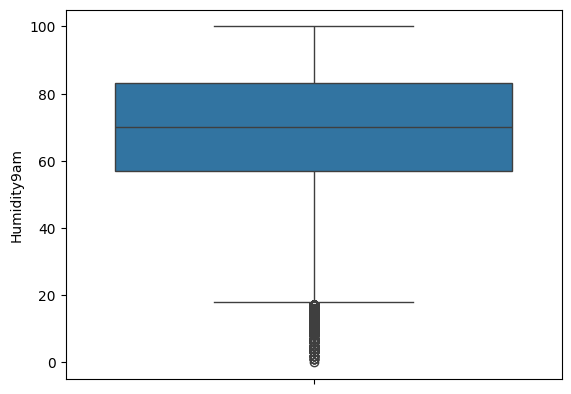

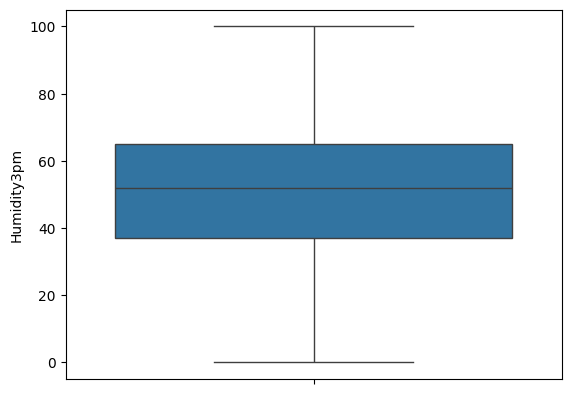

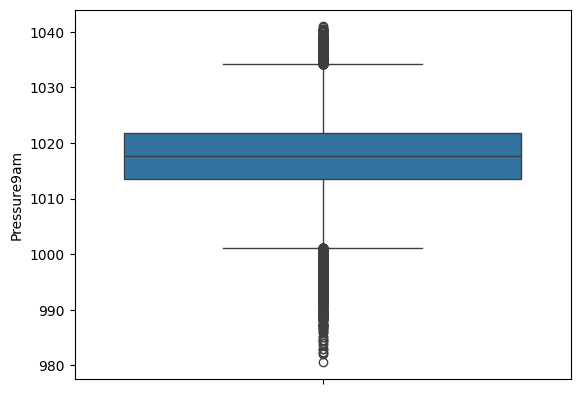

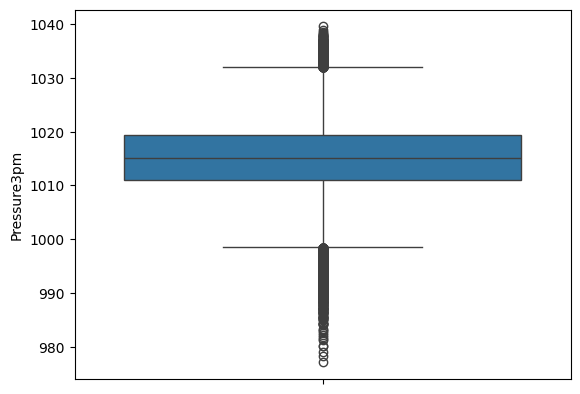

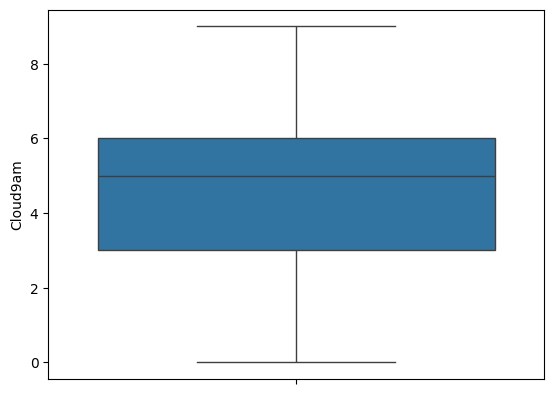

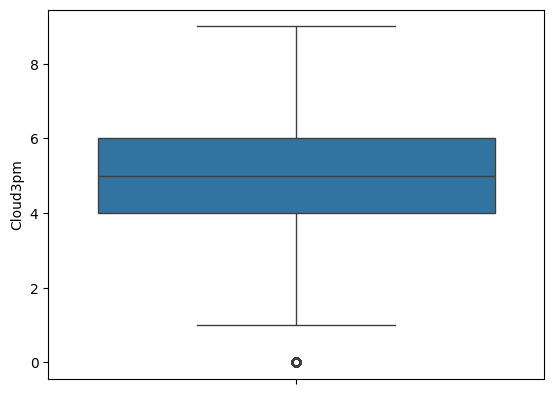

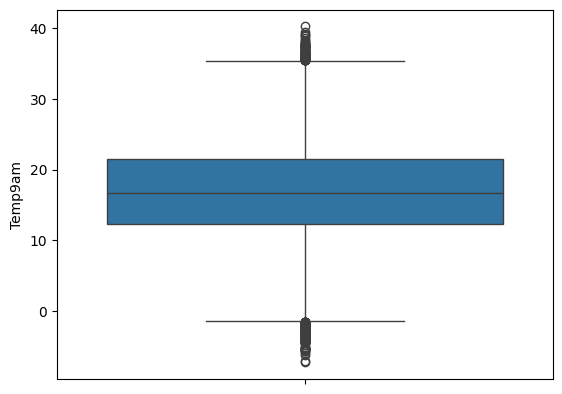

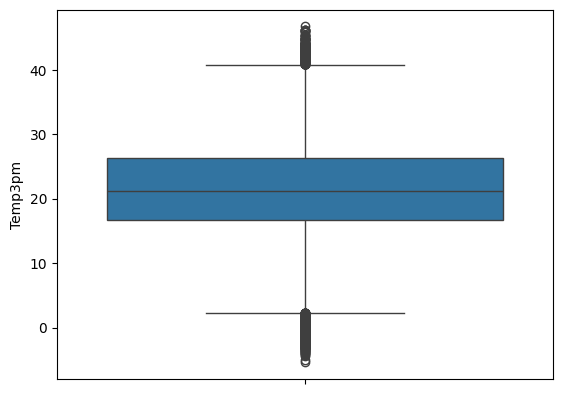

In [ ]:
for i in numeric_cols.columns:
  sns.boxplot(df[i])
  plt.show()

In [ ]:
!pip install feature-engine

In [ ]:
list1=[]
for i in numeric_cols:
  list1.append(i)

In [ ]:
from feature_engine.outliers import Winsorizer
winsor=Winsorizer(capping_method='quantiles',tail='both',variables=list1)

In [ ]:
winsor.fit(df)

Winsorizer(capping_method='quantiles', tail='both',
           variables=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
                      'Sunshine', 'WindGustSpeed', 'WindSpeed9am',
                      'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                      'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                      'Temp9am', 'Temp3pm'])

In [ ]:
data=winsor.transform(df)

In [ ]:
number=data.select_dtypes(include=['int64','float64'])

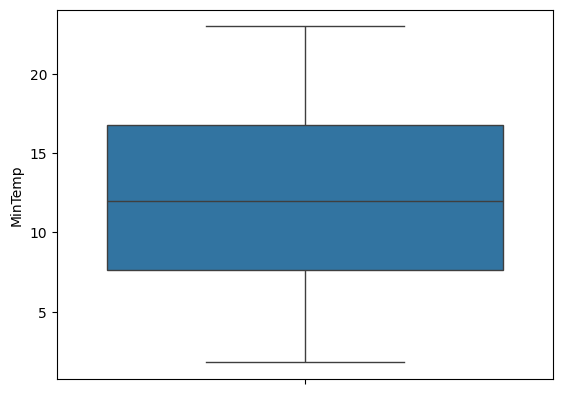

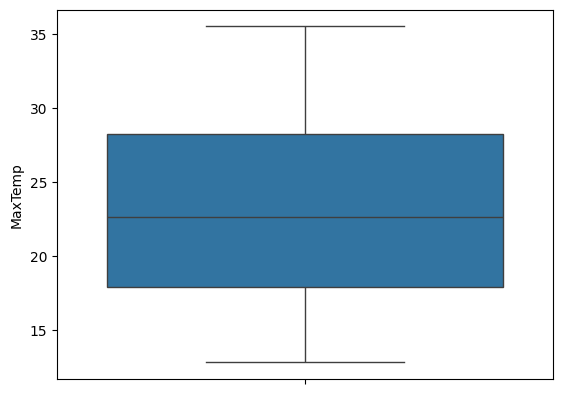

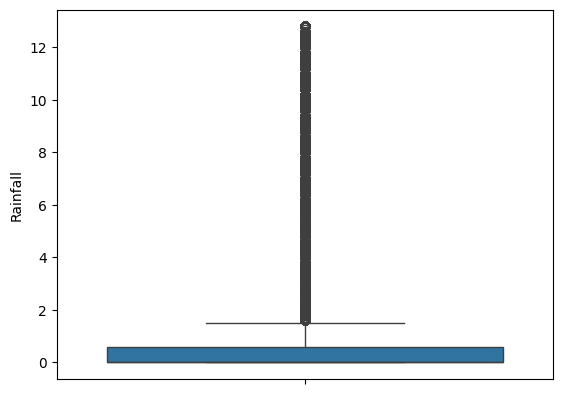

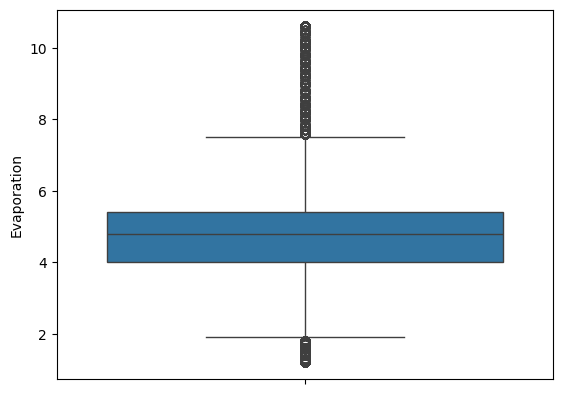

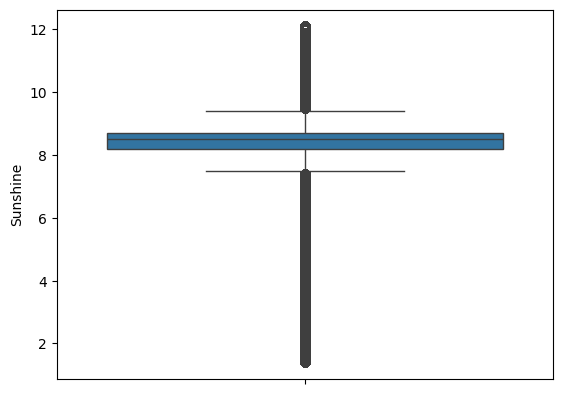

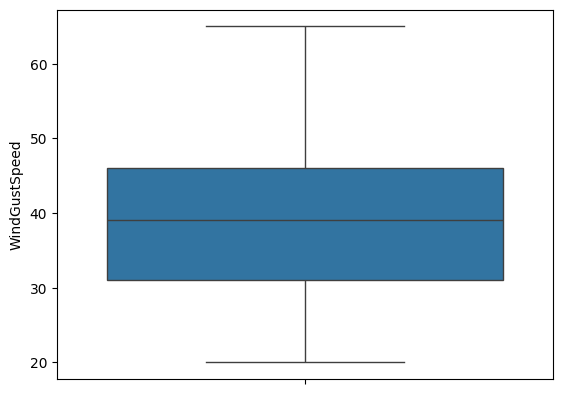

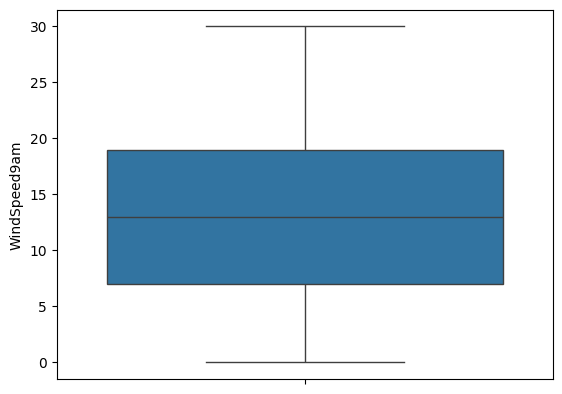

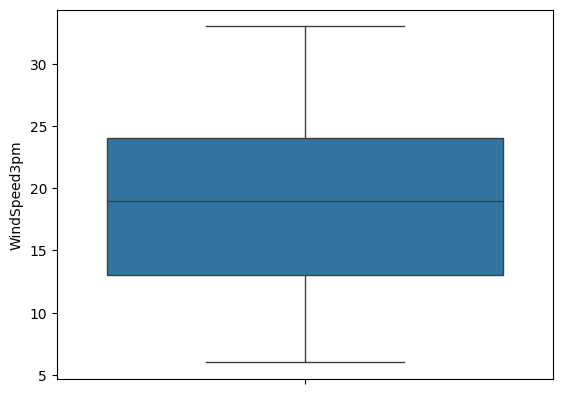

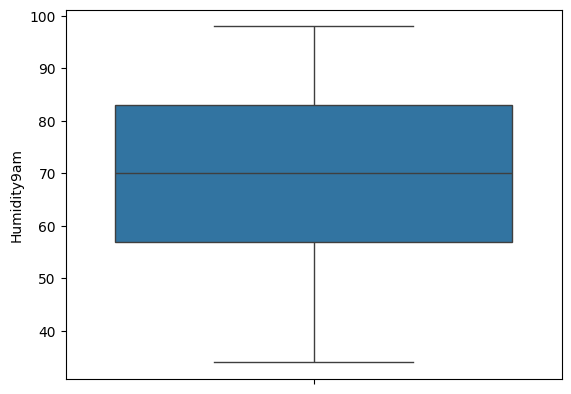

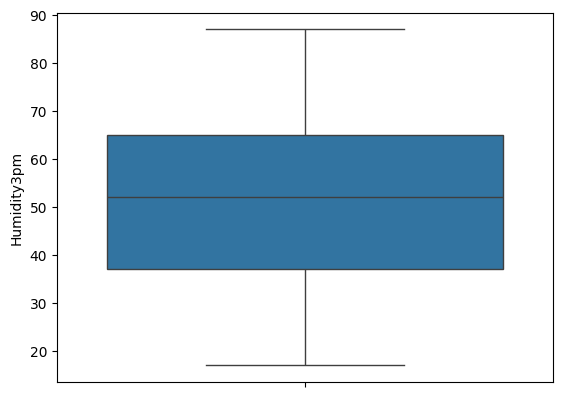

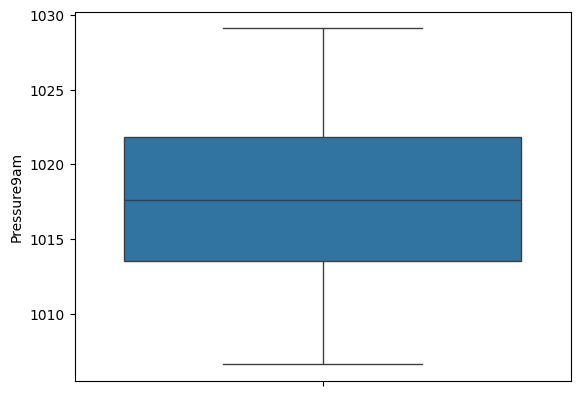

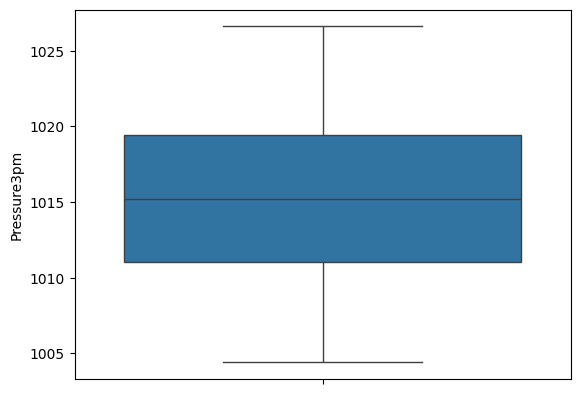

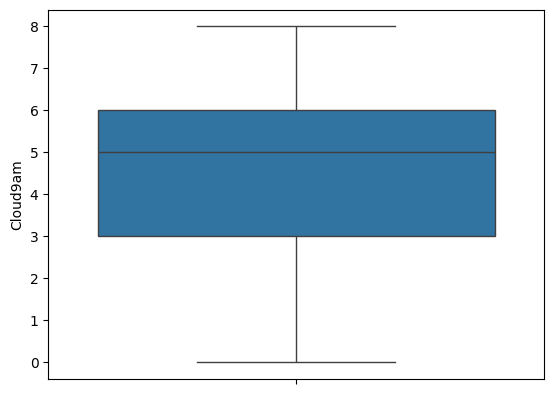

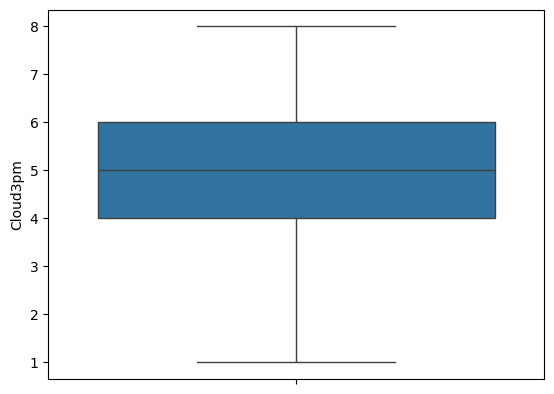

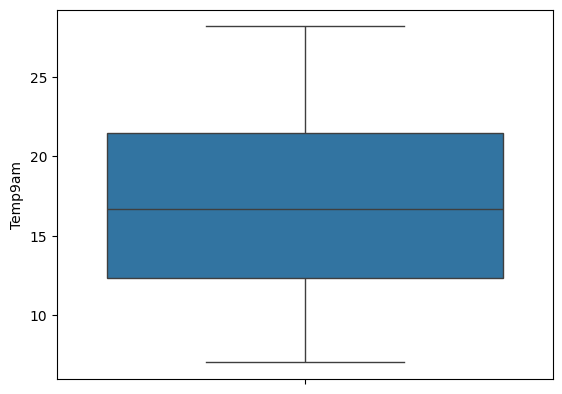

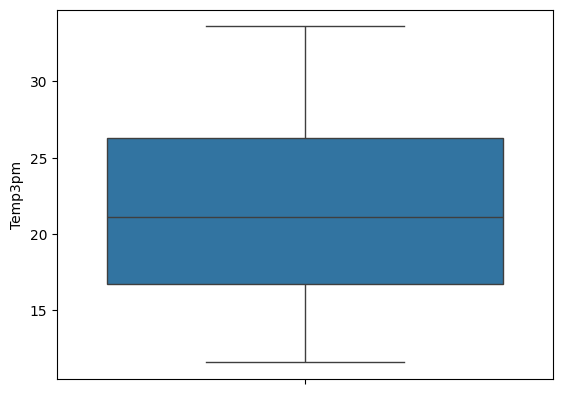

In [ ]:
for i in number.columns:
  sns.boxplot(data[i])
  plt.show()

In [ ]:
import numpy as np

In [ ]:
#iqr capping
for i in number.columns:
  q1=data[i].quantile(0.25)
  q3=data[i].quantile(0.75)
  iqr=q3-q1
  low=q1-1.5*iqr
  high=q3+1.5*iqr
  data[i]=np.where(data[i]>high,high,np.where(data[i]<low,low,data[i]))

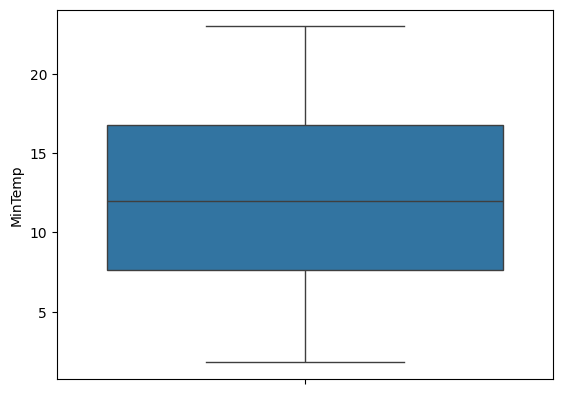

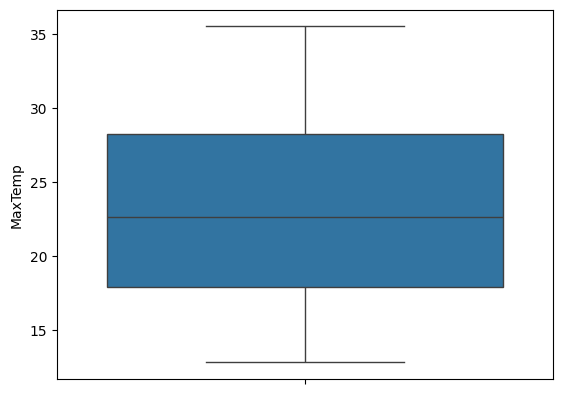

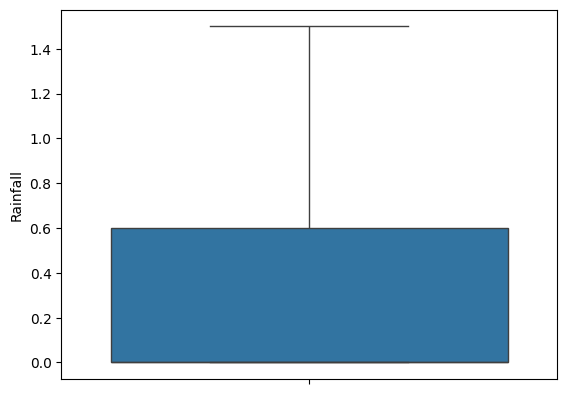

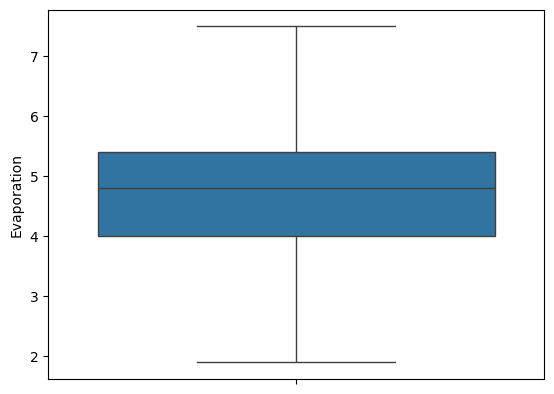

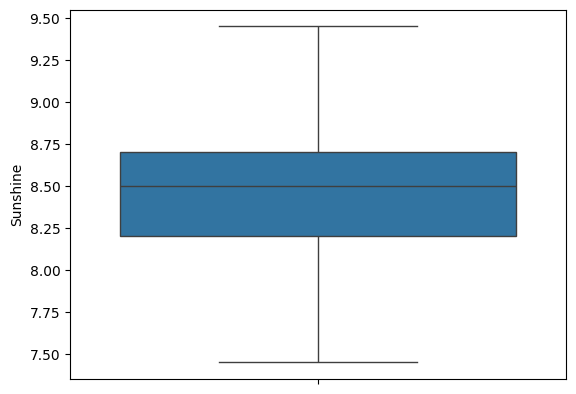

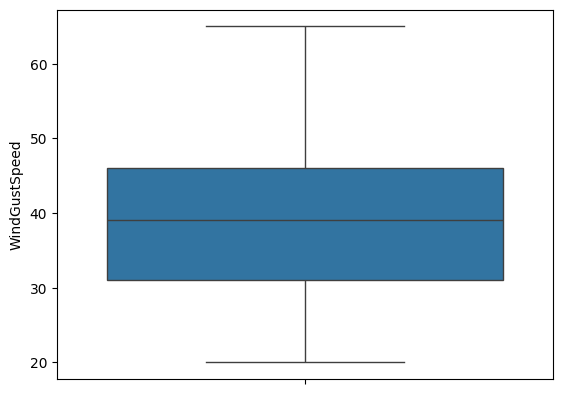

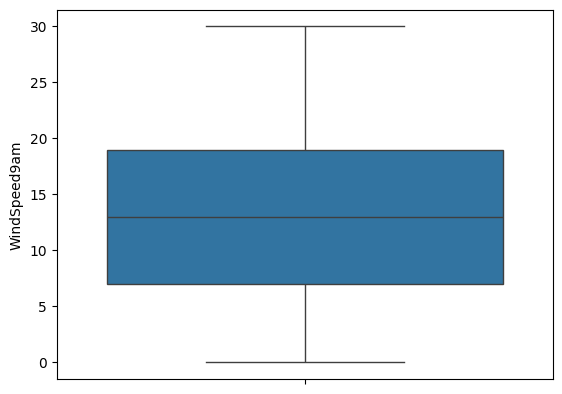

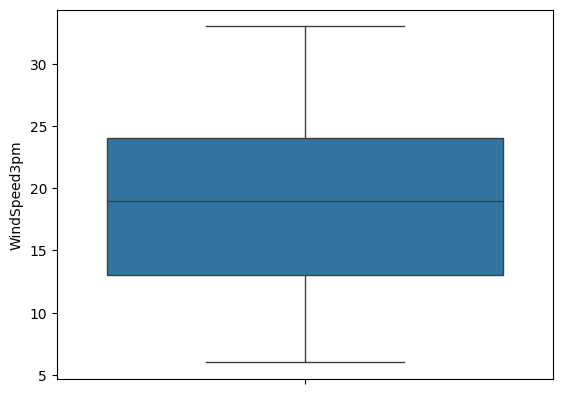

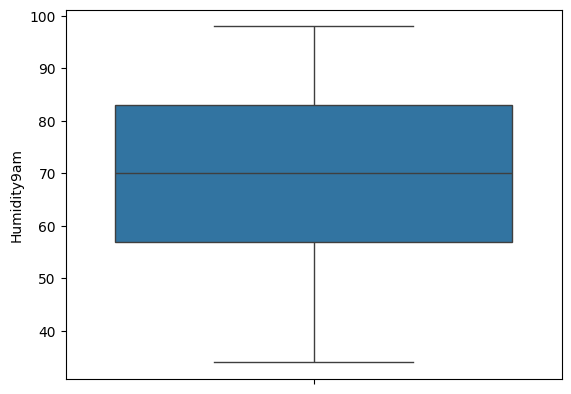

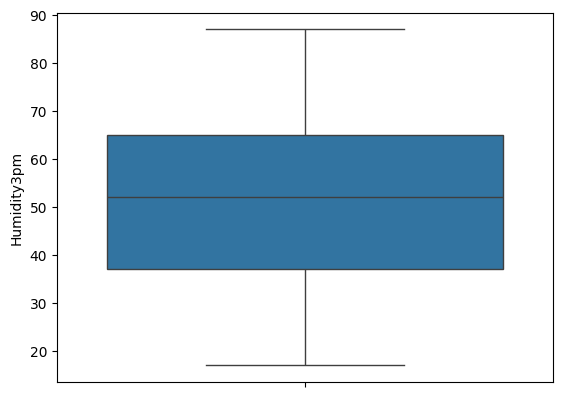

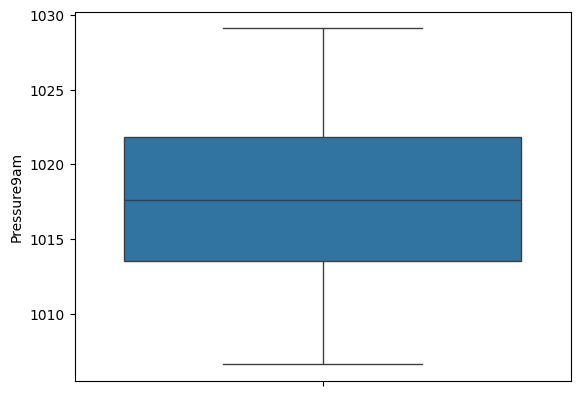

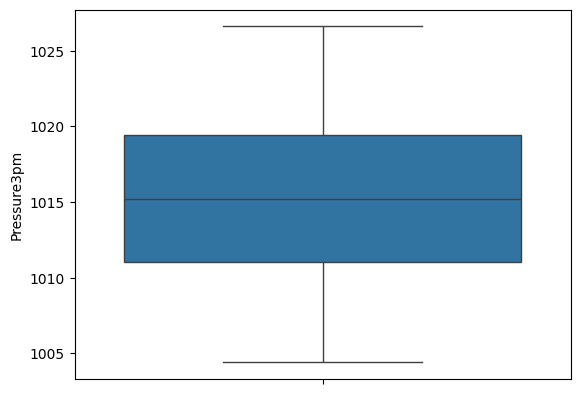

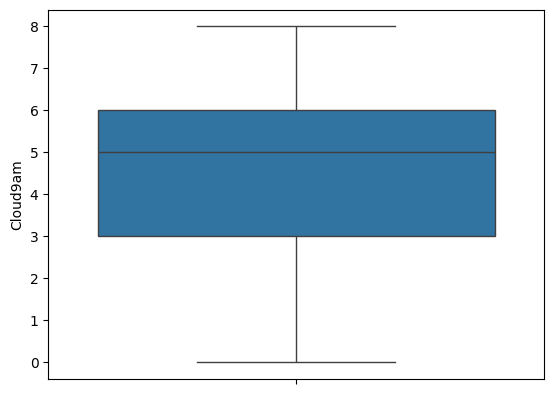

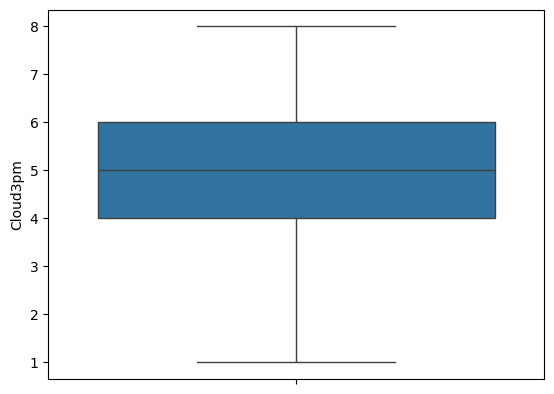

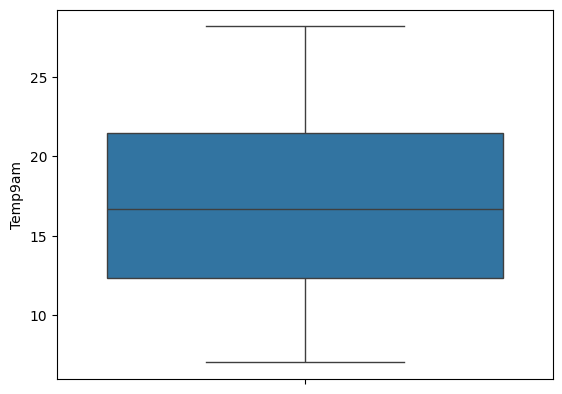

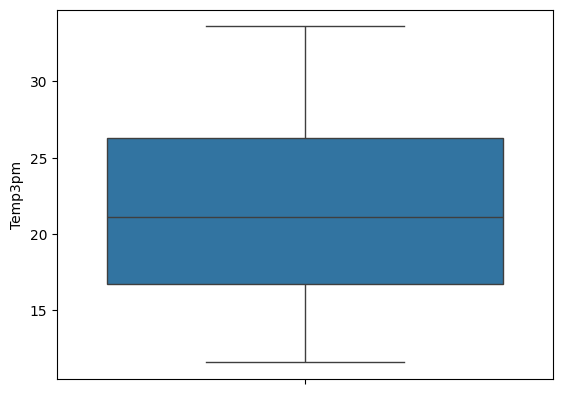

In [ ]:
for i in number.columns:
  sns.boxplot(data[i])
  plt.show()

In [ ]:
data.isnull().sum()

,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0


In [ ]:
data.duplicated().value_counts()

,count
False,142142
True,51


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,4.8,8.5,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,4.8,8.5,NE,24.0,SE,E,...,45.0,17.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,4.8,8.5,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,Uluru,3.5,21.8,0.0,4.8,8.5,E,31.0,ESE,E,...,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9,No,No
142189,Uluru,2.8,23.4,0.0,4.8,8.5,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,No,No
142190,Uluru,3.6,25.3,0.0,4.8,8.5,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,No,No
142191,Uluru,5.4,26.9,0.0,4.8,8.5,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,No,No


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
Transformer=ColumnTransformer([('num1',StandardScaler(),number.columns),('cat1',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),category_col.columns.drop('RainTomorrow'))])

In [ ]:
pipeline=Pipeline([('scaling',Transformer),('model',LogisticRegression(max_iter=1000))])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data.drop(['RainTomorrow'],axis=1),data['RainTomorrow'],test_size=0.2,random_state=42)

In [ ]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('scaling',
                 ColumnTransformer(transformers=[('num1', StandardScaler(),
                                                  Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')),
                                                 ('cat1',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object'))])),
                ('model', LogisticRegression(max_iter=1000))])

In [ ]:
y_pred=pipeline.predict(x_test)

In [ ]:
y_pred

array(['No', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
pipeline.score(x_train,y_train)

0.8465962554853007

In [ ]:
pipeline.score(x_test,y_test)

0.8476203876323473

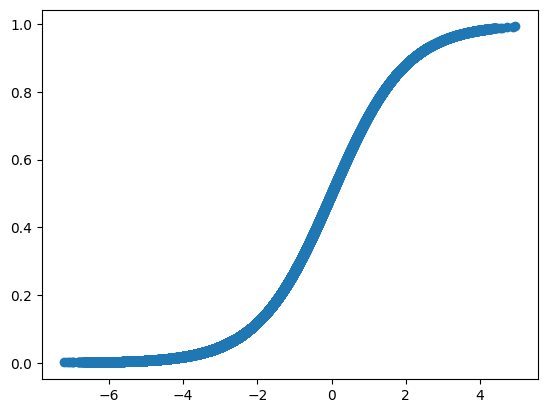

In [ ]:
z=pipeline.decision_function(x_train)
proba=1/(1+(2.718)**(-z))
plt.scatter(z,proba)